C:\Users\singh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Intercepts: [ 10.41609392   2.83379147 -13.24988539]
Coefficients:
 [[-2.57475954 -1.0882264 ]
 [ 0.11130402 -0.84262217]
 [ 2.46345552  1.93084857]]
Train Accuracy: 0.9666666666666667
Test Accuracy : 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



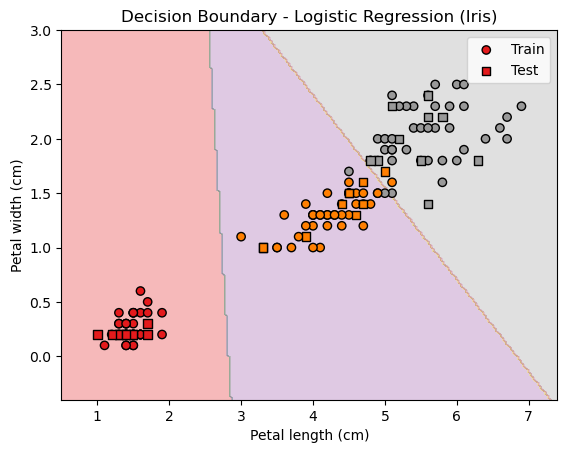

In [1]:
# Logistic Regression on Iris dataset with Visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# 1. Load dataset
# -----------------------------
iris = load_iris()
X = iris.data[:, (2, 3)]   # choose 2 features: petal length, petal width
y = iris.target            # 3 classes: setosa, versicolor, virginica

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 2. Train logistic regression
# -----------------------------
lr_model = LogisticRegression(max_iter=200, multi_class="auto")
lr_model.fit(X_train, y_train)

print("Intercepts:", lr_model.intercept_)
print("Coefficients:\n", lr_model.coef_)

# -----------------------------
# 3. Evaluate model
# -----------------------------
print("Train Accuracy:", lr_model.score(X_train, y_train))
print("Test Accuracy :", lr_model.score(X_test, y_test))

y_pred = lr_model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 4. Plot decision boundaries
# -----------------------------
# Create meshgrid
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict class for each grid point
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set1")

# Scatter plot of training data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor="k", cmap="Set1", marker="o", label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor="k", cmap="Set1", marker="s", label="Test")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Boundary - Logistic Regression (Iris)")
plt.legend()
plt.show()
